## Indian Start-Up Funding Ecosystem

In [24]:
# Import requisite libraries
import pyodbc    
from dotenv import dotenv_values
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Collection

In [25]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [26]:
# Establish a connection to the DAPS Project database using the PyODBC library
connection = pyodbc.connect(connection_string)

In [27]:
# Access the 2018 dataset
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv'

dat1 = pd.read_csv(url)
dat1

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [28]:
# Save the Dataframe to a file locally
dat1.to_csv('startup_funding2018.csv')

In [29]:
# Access the 2019 dataset

dat2 = pd.read_csv(r'C:\Users\HP SPECTRE\OneDrive\Desktop\startup_funding2019.csv')
dat2

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [30]:
# Save the Dataframe to a file locally
dat2.to_csv('startup_funding2019.csv')

In [31]:
query = "Select * from LP1_startup_funding2020"

dat3 = pd.read_sql(query, connection)
dat3

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [32]:
# Save the Dataframe to a file locally
dat3.to_csv('startup_funding2020.csv')

In [33]:
query = "Select * from dbo.LP1_startup_funding2021"

dat4 = pd.read_sql(query, connection)
dat4

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [34]:
# Save the Dataframe to a file locally
dat4.to_csv('startup_funding2021.csv')

### Loading the datasets

In [35]:
# Creating dataframes based on each dataset

data1 = 'startup_funding2018.csv'
data2 = 'startup_funding2019.csv'
data3 = 'startup_funding2020.csv'
data4 = 'startup_funding2021.csv'

df1 = pd.read_csv(data1)
df2 = pd.read_csv(data2)
df3 = pd.read_csv(data3)
df4 = pd.read_csv(data4)

In [36]:
# Adding a year column to each dataset so that rows are not lost should it become necessary to merge all datasets later on
year_1 = 2018
df1['Year'] = year_1

year_2 = 2019
df2['Year'] = year_2

year_3 = 2020
df3['Year'] = year_3

year_4 = 2021
df4['Year'] = year_4

# Convert the year column from int data type to year data type
df1['Year'] = pd.to_datetime(df1['Year'], format='%Y').dt.year

df2['Year'] = pd.to_datetime(df2['Year'], format='%Y').dt.year

df3['Year'] = pd.to_datetime(df3['Year'], format='%Y').dt.year

df4['Year'] = pd.to_datetime(df4['Year'], format='%Y').dt.year

### Data Cleaning

In [37]:
# Preview of df1
df1.head()

,Unnamed: 0,Company Name,Industry,Round/Series,Amount,Location,About Company,Year
0,0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [38]:
# Preview of df2
df2.head()

,Unnamed: 0,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [39]:
# Preview of df3
df3.head()

,Unnamed: 0,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,NaN,2020
1,1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,NaN,2020
2,2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,NaN,2020
3,3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,NaN,2020
4,4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,NaN,2020


In [40]:
# Preview of df4
df4.head()

,Unnamed: 0,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
0,0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN,2021
2,2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [41]:
# Information on df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     526 non-null    int64 
 1   Company Name   526 non-null    object
 2   Industry       526 non-null    object
 3   Round/Series   526 non-null    object
 4   Amount         526 non-null    object
 5   Location       526 non-null    object
 6   About Company  526 non-null    object
 7   Year           526 non-null    int32 
dtypes: int32(1), int64(1), object(6)
memory usage: 30.9+ KB


In [42]:
# Rename columns in df1 to match columns with similar content in df2, df3 and df4
df1 = df1.rename(columns = {'Company Name' : 'Company_Brand', 'Round/Series' : 'Stage', 'About Company' : 'What_it_does', 'Amount' : 'Amount($)'})

In [43]:
# Extract Headquarters information from df1's Location column
df1['Headquarters'] = df1['Location'].str.split(',').str[0]
df1['Headquarters']

0      Bangalore
1         Mumbai
2        Gurgaon
3          Noida
4      Hyderabad
         ...    
521    Bangalore
522      Haryana
523       Mumbai
524       Mumbai
525      Chennai
Name: Headquarters, Length: 526, dtype: object

In [44]:
df1['Sector'] = df1['Industry'].str.split(',').str[0]
df1[df1['Sector'] == 'Agritech']

,Unnamed: 0,Company_Brand,Industry,Stage,Amount($),Location,What_it_does,Year,Headquarters,Sector


In [45]:
# Convert Amount from object to float data type

# First, remove currency symbol ₹
df1['Amount($)'] = df1['Amount($)'].str.replace('₹', '')

# Remove the comma (,) symbol
df1['Amount($)'] = df1['Amount($)'].str.replace(',', '')

# Remove the hyphen (—) symbol
df1['Amount($)'] = df1['Amount($)'].str.replace('—', '')

# Replace all empty spaces with 0
df1['Amount($)'] = df1['Amount($)'].str.replace('', '0')

# Replace all strings longer than 9 character
max_length = 9
df1['Amount($)'] = df1['Amount($)'].apply(lambda x: '0' if len(x) > max_length else x)

# df1['Amount($)'] = df1['Amount($)'].str.replace('0000000$0000000100000004000000030000000100000004000000050000000', '0')

# df1['Amount($)'] = df1['Amount($)'].str.replace('000000000000000$000000000000000100000000000000040000000000000003000000000000000100000000000000040000000000000005000000000000000', '0')

# Remove all white spaces
df1['Amount($)'] = df1['Amount($)'].str.strip()

df1['Amount($)'] = df1['Amount($)'].astype(np.float64).round(2)

In [46]:
df1.drop(columns = ['Industry', 'Location'])

,Unnamed: 0,Company_Brand,Stage,Amount($),What_it_does,Year,Headquarters,Sector
0,0,TheCollegeFever,Seed,0.0,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore,Brand Marketing
1,1,Happy Cow Dairy,Seed,0.0,A startup which aggregates milk from dairy far...,2018,Mumbai,Agriculture
2,2,MyLoanCare,Series A,0.0,Leading Online Loans Marketplace in India,2018,Gurgaon,Credit
3,3,PayMe India,Angel,0.0,PayMe India is an innovative FinTech organizat...,2018,Noida,Financial Services
4,4,Eunimart,Seed,0.0,Eunimart is a one stop solution for merchants ...,2018,Hyderabad,E-Commerce Platforms
...,...,...,...,...,...,...,...,...
521,521,Udaan,Series C,0.0,"Udaan is a B2B trade platform, designed specif...",2018,Bangalore,B2B
522,522,Happyeasygo Group,Series A,0.0,HappyEasyGo is an online travel domain.,2018,Haryana,Tourism
523,523,Mombay,Seed,70500000.0,Mombay is a unique opportunity for housewives ...,2018,Mumbai,Food and Beverage
524,524,Droni Tech,Seed,0.0,Droni Tech manufacture UAVs and develop softwa...,2018,Mumbai,Information Technology


In [47]:
# Checking information on df1 after cleaning the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     526 non-null    int64  
 1   Company_Brand  526 non-null    object 
 2   Industry       526 non-null    object 
 3   Stage          526 non-null    object 
 4   Amount($)      526 non-null    float64
 5   Location       526 non-null    object 
 6   What_it_does   526 non-null    object 
 7   Year           526 non-null    int32  
 8   Headquarters   526 non-null    object 
 9   Sector         526 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 39.2+ KB


In [48]:
df2.Sector

0                   Ecommerce
1                      Edtech
2                      Edtech
3             Interior design
4                    AgriTech
               ...           
84                  Infratech
85                Hospitality
86    Automobile & Technology
87                 Automobile
88                    Banking
Name: Sector, Length: 89, dtype: object

In [49]:
# Checking df2 information before data cleaning
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     89 non-null     int64  
 1   Company/Brand  89 non-null     object 
 2   Founded        60 non-null     float64
 3   HeadQuarter    70 non-null     object 
 4   Sector         84 non-null     object 
 5   What it does   89 non-null     object 
 6   Founders       86 non-null     object 
 7   Investor       89 non-null     object 
 8   Amount($)      89 non-null     object 
 9   Stage          43 non-null     object 
 10  Year           89 non-null     int32  
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 7.4+ KB


In [50]:
# Fill missing values in Founded column
df2['Founded'] = df2['Founded'].fillna(0)

In [51]:
# Fill missing values in Founded column
df2['Founded'] = df2['Founded'].fillna(0)

In [52]:
# Convert Founded column from float to int
df2['Founded'] = df2['Founded'].astype(int)

In [53]:
# Rename Headquarter to Headquarters
df2 = df2.rename(columns = {'Company/Brand' : 'Company_Brand', 'What it does' : 'What_it_does', 'HeadQuarter' : 'Headquarters'})

In [54]:
# Convert Amount column from object to float data type

# Remove currency symbol $
df2['Amount($)'] = df2['Amount($)'].str.replace('$', '')

# Remove the comma (,) symbol
df2['Amount($)'] = df2['Amount($)'].str.replace(',', '')

# Replace all strings longer than 9 character
max_length = 9
df2['Amount($)'] = df2['Amount($)'].apply(lambda x: '0' if len(x) > max_length else x)

# Remove all white spaces
df2['Amount($)'] = df2['Amount($)'].str.strip()

df2['Amount($)'] = df2['Amount($)'].astype(np.float64).round(2)

In [55]:
df2.isna().sum()

Unnamed: 0        0
Company_Brand     0
Founded           0
Headquarters     19
Sector            5
What_it_does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
Year              0
dtype: int64

In [56]:
df2[['Headquarters', 'Sector', 'Founders', 'Stage']] = df2[['Headquarters', 'Sector', 'Founders', 'Stage']].fillna('')

In [57]:
df2.isna().sum()

Unnamed: 0       0
Company_Brand    0
Founded          0
Headquarters     0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
Year             0
dtype: int64

In [58]:
# Checking df2 after data cleaning
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     89 non-null     int64  
 1   Company_Brand  89 non-null     object 
 2   Founded        89 non-null     int32  
 3   Headquarters   89 non-null     object 
 4   Sector         89 non-null     object 
 5   What_it_does   89 non-null     object 
 6   Founders       89 non-null     object 
 7   Investor       89 non-null     object 
 8   Amount($)      89 non-null     float64
 9   Stage          89 non-null     object 
 10  Year           89 non-null     int32  
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 7.1+ KB


In [59]:
# df3 information before data cleaning
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1055 non-null   int64  
 1   Company_Brand  1055 non-null   object 
 2   Founded        842 non-null    float64
 3   HeadQuarter    961 non-null    object 
 4   Sector         1042 non-null   object 
 5   What_it_does   1055 non-null   object 
 6   Founders       1043 non-null   object 
 7   Investor       1017 non-null   object 
 8   Amount         801 non-null    float64
 9   Stage          591 non-null    object 
 10  column10       2 non-null      object 
 11  Year           1055 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(8)
memory usage: 94.9+ KB


In [60]:
# Rename Headquarter to Headquarters
df3 = df3.rename(columns = {'HeadQuarter' : 'Headquarters', 'Amount' : 'Amount($)'})

In [61]:
df3['Founded'] = df3['Founded'].fillna('0')

In [62]:
# Convert Founded column from float to int
df3['Founded'] = df3['Founded'].astype(int)

In [63]:
# # Convert Amount($) column from object to float data type

# # Remove currency symbol $
# df3['Amount($)'] = df3['Amount($)'].str.replace('$', '')

# # Remove the comma (,) symbol
# df3['Amount($)'] = df3['Amount($)'].str.replace(',', '')

# # Replace all strings longer than 9 character
# max_length = 9
# df3['Amount($)'] = df3['Amount($)'].apply(lambda x: '0' if len(x) > max_length else x)

# # Remove all white spaces
# df3['Amount($)'] = df3['Amount($)'].str.strip()

# df3['Amount($)'] = df3['Amount($)'].astype(np.float64).round(2)
df3['Amount($)'].isna().sum()

254

In [64]:
df3['Amount($)'] = df3['Amount($)'].fillna(0)

In [65]:
df3['Stage'].describe()

count          591
unique          42
top       Series A
freq            96
Name: Stage, dtype: object

In [66]:
df3.isna().sum()

Unnamed: 0          0
Company_Brand       0
Founded             0
Headquarters       94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount($)           0
Stage             464
column10         1053
Year                0
dtype: int64

In [67]:
df3['Stage'] = df3['Stage'].fillna('Unknown')
df3['Stage'].isna().sum()

0

In [68]:
df3.tail(20)

,Unnamed: 0,Company_Brand,Founded,Headquarters,Sector,What_it_does,Founders,Investor,Amount($),Stage,column10,Year
1035,1035,Byju,2011,NaN,Edtech,Provides online learning classes,Byju Raveendran,Tiger Global,200000000.0,Unknown,NaN,2020
1036,1036,Generico,0,Mumbai,Pharmacy,Generic medicine focussed retail chain,Siddharth Gadia,Alteria Capital,1400000.0,Unknown,NaN,2020
1037,1037,HighRadius,2016,Hyderabad,SaaS,"An AI-based platform, to automate accounts rec...",Sashi Narahari,ICONIQ Capital,125000000.0,Series B,NaN,2020
1038,1038,Chai Kings,0,Chennai,Beverage,It offers a range of tea in various flavour,"Jahabar Sadique, Balaji Sadagopan",The Chennai Angels (TCA),1000000.0,Unknown,NaN,2020
1039,1039,Rivigo,2014,Gurugram,Logistics,It offers delivery services across India to re...,"Deepak Garg, Gazal Kalra",Trifecta Capital,3400000.0,Series F,NaN,2020
1040,1040,BuildPan,2019,Indore,SaaS,"It helps developers to test, integrate and dep...","Sonal Khandelwal, Vaibhav Tiwari","HNIs in India, Japan, and the US",0.0,Seed Round,NaN,2020
1041,1041,Shiksha,2008,NaN,Edtech,It makes college selection easy for students l...,Kanav Sachdeva,Mumbai Angels Network,181000.0,Unknown,NaN,2020
1042,1042,Super Surfaces,0,Hyderabad,Deisgning,A design solution based company,Kumar Varma,Vishnu Reddy,500000.0,Series A,NaN,2020
1043,1043,Quicko,0,Ahmedabad,Taxation,Online tax planning and filing platform,Vishvajit Sonagara,"Zerodha fintech fund, Rainmatter",280000.0,Unknown,NaN,2020
1044,1044,Satin Creditcare,0,Gurgaon,Fintech,A micro finance company,NaN,Austrian Bank,15000000.0,Unknown,NaN,2020


In [69]:
# df3 after renaming column
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1055 non-null   int64  
 1   Company_Brand  1055 non-null   object 
 2   Founded        1055 non-null   int32  
 3   Headquarters   961 non-null    object 
 4   Sector         1042 non-null   object 
 5   What_it_does   1055 non-null   object 
 6   Founders       1043 non-null   object 
 7   Investor       1017 non-null   object 
 8   Amount($)      1055 non-null   float64
 9   Stage          1055 non-null   object 
 10  column10       2 non-null      object 
 11  Year           1055 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(8)
memory usage: 90.8+ KB


In [70]:
# df4 information before data cleaning
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1209 non-null   int64  
 1   Company_Brand  1209 non-null   object 
 2   Founded        1208 non-null   float64
 3   HeadQuarter    1208 non-null   object 
 4   Sector         1209 non-null   object 
 5   What_it_does   1209 non-null   object 
 6   Founders       1205 non-null   object 
 7   Investor       1147 non-null   object 
 8   Amount         1206 non-null   object 
 9   Stage          781 non-null    object 
 10  Year           1209 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 99.3+ KB


In [71]:
# Rename Headquarter to Headquarters
df4 = df4.rename(columns = {'HeadQuarter' : 'Headquarters', 'Amount' : 'Amount($)'})

In [72]:
df4['Founded'] = df4['Founded'].fillna(0)

In [73]:
# Convert Founded column from float to int
df4['Founded'] = df4['Founded'].astype(int)

In [74]:
df4['Stage'] = df4['Stage'].fillna('')

In [75]:
# Convert Amount($) column from object to float data type

# Remove currency symbol $
df4['Amount($)'] = df4['Amount($)'].str.replace('$', '')
df4['Stage'] = df4['Stage'].str.replace('$', '')
df4['Stage'] = df4['Stage'].str.replace(',', '')
df4['Investor'] = df4['Investor'].str.replace('$', '')
df4['Investor'] = df4['Investor'].str.replace(',', '')
df4['Investor'] = df4['Investor'].str.strip()


In [76]:
# Define a function to check if a string represents an integer
def is_string_integer(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

# Apply the function to the 'Stage' column to create a boolean mask
condition = df4['Stage'].apply(is_string_integer)

# Swap values between 'Stage' and 'Amount($)' columns where condition is True
temp = df4.loc[condition, 'Stage'].copy()
df4.loc[condition, 'Stage'] = df4.loc[condition, 'Amount($)']
df4.loc[condition, 'Amount($)'] = temp



# df4[['Amount($)', 'Stage']]
df4

,Unnamed: 0,Company_Brand,Founded,Headquarters,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
0,0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon",BEENEXT Entrepreneur First,"1,200,000",Pre-series A,2021
1,1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...",Unilazer Ventures IIFL Asset Management,"120,000,000",,2021
2,2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta",GSV Ventures Westbridge Capital,"30,000,000",Series D,2021
3,3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal",CDC Group IDG Capital,"51,000,000",Series C,2021
4,4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,Liberatha Kallat Mukesh Yadav Dinesh Nagpal,"2,000,000",Seed,2021
...,...,...,...,...,...,...,...,...,...,...,...
1204,1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A,2021
1205,1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D,2021
1206,1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C,2021
1207,1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,Winter Capital ETS Man Capital,26000000,Series B,2021


In [77]:
df4.groupby(by = 'Amount($)', as_index = False).sum()

,Amount($),Unnamed: 0,Company_Brand,Founded,Headquarters,Sector,What_it_does,Founders,Investor,Stage,Year
0,,2283,EventBeepMPL,4037,PuneBangalore,EdTechsports,An inclusive community where students are insp...,"Saurabh Mangrulkar, Rakhi Pal, Venkatesh Prasa...",SucSEED Indovation Fund Uincept Palimala Vent...,Series E,4042
1,"1,000,000",16012,TaikeeFuel BuddyLearnVernmoEVingSolethreadsWiT...,66576,MumbaiNew DelhiAhmadabadGurugramGurugramGurugr...,E-commerceOil and EnergyEdTechLogisticsFashion...,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin ChhabraAditya Singh...",Jaipuria Family OfficeDSG Consumer Partners Sa...,SeedSeries ASeedPre-series ASeedSeedSeedDebtDe...,66693
2,"1,000,000,000",346,VerSe Innovation,2007,Bangalore,Innovation Management,Owner of Dailyhunt App and I-Pay,Virendra Gupta,Canaan Valley Capital Glade Brook Capital Part...,Series H,2021
3,"1,100,000",115,Jambox GamesDusMinute,4038,BangaloreBangalore,GamingRetail,A competitive game publishing platform to help...,Ravi VyasApoorva Mishra,Indian Angel Network,SeedPre-series A,4042
4,"1,200,000",0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon",BEENEXT Entrepreneur First,Pre-series A,2021
...,...,...,...,...,...,...,...,...,...,...,...
268,Pre-series A,545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",1000000,,2021
269,Seed,1405,MoEVingGodamwale,4037,Gurugram\t#REF!Mumbai,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank JainGodamwale is tech e...","Anshuman Maheshwary, Dr Srihari Raju Kalidindi...",50000001000000\t#REF!,,4042
270,Series C,498,Fullife HealthcareFullife Healthcare,4018,Pharmaceuticals\t#REF!Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun KhannaVarun Khanna,Morgan Stanley Private Equity AsiaMorgan Stanl...,2200000022000000,,4042
271,Undisclosed,68285,Qube HealthVitra.aiUableTruNativAntWakRage Cof...,234051,MumbaiBangaloreBangaloreMumbaiBangaloreNew Del...,HealthTechTech StartupEdTechFood & BeveragesEd...,India's Most Respected Workplace Healthcare Ma...,Gagan KapurAkash Nidhi PSSaurabh SaxenaPranav ...,Inflection Point VenturesInflexor VenturesChir...,Pre-series ASeedSeedSeedPre-series APre-series...,234436


In [78]:
df4['Amount($)'].isna().sum()

2

In [79]:
df4['Amount($)'] = df4['Amount($)'].fillna('0')

In [80]:
# Define the pattern you want to search for in the 'Amount($)' column
pattern = 'Series'  # Replace 'pattern' with your desired pattern

# Identify rows where the 'Amount($)' column contains the specified pattern
condition = df4['Amount($)'].str.contains(pattern)

# Move the values from 'Amount($)' to 'Stage' where the pattern is found
df4.loc[condition, 'Stage'] = df4.loc[condition, 'Amount($)']

# Replace the values in 'Amount($)' with NaN where the pattern is found
df4.loc[condition, 'Amount($)'] = pd.NA

df4.groupby(by = 'Amount($)', as_index = False).sum()

,Amount($),Unnamed: 0,Company_Brand,Founded,Headquarters,Sector,What_it_does,Founders,Investor,Stage,Year
0,,2283,EventBeepMPL,4037,PuneBangalore,EdTechsports,An inclusive community where students are insp...,"Saurabh Mangrulkar, Rakhi Pal, Venkatesh Prasa...",SucSEED Indovation Fund Uincept Palimala Vent...,Series E,4042
1,0,1186,OnsuritySochcast,4040,BangaloreOnline Media\t#REF!,HealthCareSochcast is an Audio experiences com...,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh AgarwalVinners, Raj Nayak, ...",Jitendra Gupta Harsh ShahUndisclosed,,4042
2,"1,000,000",16012,TaikeeFuel BuddyLearnVernmoEVingSolethreadsWiT...,66576,MumbaiNew DelhiAhmadabadGurugramGurugramGurugr...,E-commerceOil and EnergyEdTechLogisticsFashion...,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin ChhabraAditya Singh...",Jaipuria Family OfficeDSG Consumer Partners Sa...,SeedSeries ASeedPre-series ASeedSeedSeedDebtDe...,66693
3,"1,000,000,000",346,VerSe Innovation,2007,Bangalore,Innovation Management,Owner of Dailyhunt App and I-Pay,Virendra Gupta,Canaan Valley Capital Glade Brook Capital Part...,Series H,2021
4,"1,100,000",115,Jambox GamesDusMinute,4038,BangaloreBangalore,GamingRetail,A competitive game publishing platform to help...,Ravi VyasApoorva Mishra,Indian Angel Network,SeedPre-series A,4042
...,...,...,...,...,...,...,...,...,...,...,...
268,96000000,258,Pristyn Care,2018,Gurugram,Hospital & Health Care,A new age health tech company that aims to sim...,"Harsimarbir (Harsh) Singh, Dr Vaibhav Kapoor, ...",Kunal Shah Deepinder Goyal Abhiraj Singh Bhal,Series E,2021
269,Pre-series A,545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",1000000,,2021
270,Seed,1405,MoEVingGodamwale,4037,Gurugram\t#REF!Mumbai,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank JainGodamwale is tech e...","Anshuman Maheshwary, Dr Srihari Raju Kalidindi...",50000001000000\t#REF!,,4042
271,Undisclosed,68285,Qube HealthVitra.aiUableTruNativAntWakRage Cof...,234051,MumbaiBangaloreBangaloreMumbaiBangaloreNew Del...,HealthTechTech StartupEdTechFood & BeveragesEd...,India's Most Respected Workplace Healthcare Ma...,Gagan KapurAkash Nidhi PSSaurabh SaxenaPranav ...,Inflection Point VenturesInflexor VenturesChir...,Pre-series ASeedSeedSeedPre-series APre-series...,234436


In [81]:
df4['Amount($)'] = df4['Amount($)'].fillna('0')

In [82]:
# Define the pattern you want to search for in the 'Amount($)' column
pattern = 'Seed'  # Replace 'pattern' with your desired pattern

# Identify rows where the 'Amount($)' column contains the specified pattern
condition = df4['Amount($)'].str.contains(pattern)

# Move the values from 'Amount($)' to 'Stage' where the pattern is found
df4.loc[condition, 'Stage'] = df4.loc[condition, 'Amount($)']

# Replace the values in 'Amount($)' with NaN where the pattern is found
df4.loc[condition, 'Amount($)'] = pd.NA

df4.groupby(by = 'Amount($)', as_index = False).sum()

,Amount($),Unnamed: 0,Company_Brand,Founded,Headquarters,Sector,What_it_does,Founders,Investor,Stage,Year
0,,2283,EventBeepMPL,4037,PuneBangalore,EdTechsports,An inclusive community where students are insp...,"Saurabh Mangrulkar, Rakhi Pal, Venkatesh Prasa...",SucSEED Indovation Fund Uincept Palimala Vent...,Series E,4042
1,0,1684,OnsurityFullife HealthcareFullife HealthcareSo...,8058,BangalorePharmaceuticals\t#REF!Pharmaceuticals...,HealthCarePrimary Business is Development and ...,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh AgarwalMorgan Stanley Priva...",Jitendra Gupta Harsh Shah2200000022000000Undis...,Series CSeries C,8084
2,"1,000,000",16012,TaikeeFuel BuddyLearnVernmoEVingSolethreadsWiT...,66576,MumbaiNew DelhiAhmadabadGurugramGurugramGurugr...,E-commerceOil and EnergyEdTechLogisticsFashion...,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin ChhabraAditya Singh...",Jaipuria Family OfficeDSG Consumer Partners Sa...,SeedSeries ASeedPre-series ASeedSeedSeedDebtDe...,66693
3,"1,000,000,000",346,VerSe Innovation,2007,Bangalore,Innovation Management,Owner of Dailyhunt App and I-Pay,Virendra Gupta,Canaan Valley Capital Glade Brook Capital Part...,Series H,2021
4,"1,100,000",115,Jambox GamesDusMinute,4038,BangaloreBangalore,GamingRetail,A competitive game publishing platform to help...,Ravi VyasApoorva Mishra,Indian Angel Network,SeedPre-series A,4042
...,...,...,...,...,...,...,...,...,...,...,...
267,9500000,367,SkepsByteLearn,4039,GurugramNoida,FinTechE-learning,"A blockchain products company, developing a pr...","Mayank Tewari, Tushar Srivastava",Bertelsmann IndiaAditya Singhal Nishant Sinha,Seed,4042
268,96000000,258,Pristyn Care,2018,Gurugram,Hospital & Health Care,A new age health tech company that aims to sim...,"Harsimarbir (Harsh) Singh, Dr Vaibhav Kapoor, ...",Kunal Shah Deepinder Goyal Abhiraj Singh Bhal,Series E,2021
269,Pre-series A,545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",1000000,,2021
270,Undisclosed,68285,Qube HealthVitra.aiUableTruNativAntWakRage Cof...,234051,MumbaiBangaloreBangaloreMumbaiBangaloreNew Del...,HealthTechTech StartupEdTechFood & BeveragesEd...,India's Most Respected Workplace Healthcare Ma...,Gagan KapurAkash Nidhi PSSaurabh SaxenaPranav ...,Inflection Point VenturesInflexor VenturesChir...,Pre-series ASeedSeedSeedPre-series APre-series...,234436


In [83]:
df4['Amount($)'] = df4['Amount($)'].fillna('0')

In [84]:
# Define the pattern you want to search for in the 'Amount($)' column
pattern = 'Pre-s'  # Replace 'pattern' with your desired pattern

# Identify rows where the 'Amount($)' column contains the specified pattern
condition = df4['Amount($)'].str.contains(pattern)

# Move the values from 'Amount($)' to 'Stage' where the pattern is found
df4.loc[condition, 'Stage'] = df4.loc[condition, 'Amount($)']

# Replace the values in 'Amount($)' with NaN where the pattern is found
df4.loc[condition, 'Amount($)'] = pd.NA

df4.groupby(by = 'Amount($)', as_index = False).sum()

,Amount($),Unnamed: 0,Company_Brand,Founded,Headquarters,Sector,What_it_does,Founders,Investor,Stage,Year
0,,2283,EventBeepMPL,4037,PuneBangalore,EdTechsports,An inclusive community where students are insp...,"Saurabh Mangrulkar, Rakhi Pal, Venkatesh Prasa...",SucSEED Indovation Fund Uincept Palimala Vent...,Series E,4042
1,0,3089,OnsurityFullife HealthcareFullife HealthcareMo...,12095,BangalorePharmaceuticals\t#REF!Pharmaceuticals...,HealthCarePrimary Business is Development and ...,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh AgarwalMorgan Stanley Priva...",Jitendra Gupta Harsh Shah220000002200000050000...,Series CSeries CSeedSeed,12126
2,"1,000,000",16012,TaikeeFuel BuddyLearnVernmoEVingSolethreadsWiT...,66576,MumbaiNew DelhiAhmadabadGurugramGurugramGurugr...,E-commerceOil and EnergyEdTechLogisticsFashion...,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin ChhabraAditya Singh...",Jaipuria Family OfficeDSG Consumer Partners Sa...,SeedSeries ASeedPre-series ASeedSeedSeedDebtDe...,66693
3,"1,000,000,000",346,VerSe Innovation,2007,Bangalore,Innovation Management,Owner of Dailyhunt App and I-Pay,Virendra Gupta,Canaan Valley Capital Glade Brook Capital Part...,Series H,2021
4,"1,100,000",115,Jambox GamesDusMinute,4038,BangaloreBangalore,GamingRetail,A competitive game publishing platform to help...,Ravi VyasApoorva Mishra,Indian Angel Network,SeedPre-series A,4042
...,...,...,...,...,...,...,...,...,...,...,...
266,"95,000,000",1178,MPLLenskart,4028,"BangaloreFaridabad, Haryana",GamingFashion,Mobile Premier League is a skill-based eSports...,"Sai Srinivas Kiran G, Shubham MalhotraAmit Cha...",Pegasus Tech Ventures Base PartnersKohlberg Kr...,,4042
267,9500000,367,SkepsByteLearn,4039,GurugramNoida,FinTechE-learning,"A blockchain products company, developing a pr...","Mayank Tewari, Tushar Srivastava",Bertelsmann IndiaAditya Singhal Nishant Sinha,Seed,4042
268,96000000,258,Pristyn Care,2018,Gurugram,Hospital & Health Care,A new age health tech company that aims to sim...,"Harsimarbir (Harsh) Singh, Dr Vaibhav Kapoor, ...",Kunal Shah Deepinder Goyal Abhiraj Singh Bhal,Series E,2021
269,Undisclosed,68285,Qube HealthVitra.aiUableTruNativAntWakRage Cof...,234051,MumbaiBangaloreBangaloreMumbaiBangaloreNew Del...,HealthTechTech StartupEdTechFood & BeveragesEd...,India's Most Respected Workplace Healthcare Ma...,Gagan KapurAkash Nidhi PSSaurabh SaxenaPranav ...,Inflection Point VenturesInflexor VenturesChir...,Pre-series ASeedSeedSeedPre-series APre-series...,234436


In [85]:
df4.groupby(by = 'Investor', as_index = False).sum()

,Investor,Unnamed: 0,Company_Brand,Founded,Headquarters,Sector,What_it_does,Founders,Amount($),Stage,Year
0,021 Capital Sparrow Capital,467,Wasabi,2021,Bangalore,Consulting,Help small businesses grow their sales via our...,"Pradeep Dodle, Nikhil Goenka",1800000,Seed,2021
1,021 Capital Y Combinator,579,Fountain9,2019,Mumbai,Computer software,"Fountain9 is a Y Combinator backed company, wh...","Niki Khokale, Rajas Lonkar",1900000,Seed,2021
2,1000000,545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",0,Pre-series A,2021
3,1000000\t#REF!,1148,Godamwale,2016,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",0,Seed,2021
4,100X.VC﻿﻿ Titan Capital Rahul Mathur Gaurav Ma...,178,BlueLearn,2020,Goa,EdTech,Building India's largest student community. Le...,"Harish Uthayakumar, Shreyans Sancheti",400000,Pre-seed,2021
...,...,...,...,...,...,...,...,...,...,...,...
932,http://100x.vc/,59,Karnival,2015,Bangalore,SaaS startup,A SAAS platform for retailers and brands to cr...,Neeraj Tyagi,"2,500,000",Seed,2021
933,iSeed Titan Capital,675,BimaPe,2020,Mumbai,FinTech,BimaPe demystifies Insurance and its Managemen...,Rahul Mathur,500000,Pre-seed,2021
934,pi Ventures,1646,Insane AIimmunitoAI,4041,BangaloreBangalore,FitnessBiotechnology,Mainstream fitness formats are a primitive sol...,"Anurag Mundhada, Jayesh Hannurkar, Sourabh Agr...",8000001000000,SeedSeed,4042
935,responsAbility Investments Blue Orchard,139,SATYA MicroCapital,2017,New Delhi,Banking,Satya MicroCapital Limited is a Delhi based NB...,Vivek Tiwari,10000000,,2021


In [86]:
df4['Investor'] = df4['Investor'].fillna('')

In [87]:
# Identify rows where 'Investor' column contains '$' symbol
condition = df4['Investor'].str.contains('1000000')

# Move values with '$' symbol from 'Investor' to 'Amount($)' column
df4.loc[condition, 'Amount($)'] = df4.loc[condition, 'Investor']

# Remove the '$' symbol from the 'Amount($)' column
df4['Amount($)'] = df4['Amount($)'].str.replace('$', '')

# Replace remaining values in 'Investor' with NaN
# df4.loc[condition, 'Investor'] = pd.NA

# print(df)

In [88]:
# Identify rows where 'Investor' column contains '$' symbol
condition = df4['Investor'].str.contains('5000000')

# Move values with '$' symbol from 'Investor' to 'Amount($)' column
df4.loc[condition, 'Amount($)'] = df4.loc[condition, 'Investor']

# Remove the '$' symbol from the 'Amount($)' column
df4['Amount($)'] = df4['Amount($)'].str.replace('$', '')

# Replace remaining values in 'Investor' with NaN
# df4.loc[condition, 'Investor'] = pd.NA

# print(df)

In [89]:
# Identify rows where 'Investor' column contains '$' symbol
condition = df4['Investor'].str.contains('1000000')

# Move values with '$' symbol from 'Investor' to 'Amount($)' column
df4.loc[condition, 'Amount($)'] = df4.loc[condition, 'Investor']

# Remove the '$' symbol from the 'Amount($)' column
df4['Amount($)'] = df4['Amount($)'].str.replace('$', '')

# Replace remaining values in 'Investor' with NaN
# df4.loc[condition, 'Investor'] = pd.NA

# print(df)

In [90]:
# Identify rows where 'Investor' column contains '$' symbol
condition = df4['Investor'].str.contains('22000000')

# Move values with '$' symbol from 'Investor' to 'Amount($)' column
df4.loc[condition, 'Amount($)'] = df4.loc[condition, 'Investor']

# Remove the '$' symbol from the 'Amount($)' column
df4['Amount($)'] = df4['Amount($)'].str.replace('$', '')
df4['Investor'] = df4['Investor'].str.replace('1000000', 'NA')
df4['Investor'] = df4['Investor'].str.replace('1000000\t#REF!', 'NA')
# Replace remaining values in 'Investor' with NaN
# df4.loc[condition, 'Investor'] = pd.NA

# print(df)

In [91]:
df4.groupby(by = 'Investor', as_index = False).sum()

,Investor,Unnamed: 0,Company_Brand,Founded,Headquarters,Sector,What_it_does,Founders,Amount($),Stage,Year
0,,34958,TaikeeJambox GamesLearnVernmoEVingWeWork India...,125020,MumbaiBangaloreAhmadabadGurugramBangaloreMumba...,E-commerceGamingEdTechLogisticsHospitalityFinT...,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin ChhabraRavi VyasNir...","1,000,0001,100,0001,000,0001,000,00026,000,000...",SeedSeedDebtPre-series ASeries EPre-series APr...,125302
1,021 Capital Sparrow Capital,467,Wasabi,2021,Bangalore,Consulting,Help small businesses grow their sales via our...,"Pradeep Dodle, Nikhil Goenka",1800000,Seed,2021
2,021 Capital Y Combinator,579,Fountain9,2019,Mumbai,Computer software,"Fountain9 is a Y Combinator backed company, wh...","Niki Khokale, Rajas Lonkar",1900000,Seed,2021
3,100X.VC﻿﻿ Titan Capital Rahul Mathur Gaurav Ma...,178,BlueLearn,2020,Goa,EdTech,Building India's largest student community. Le...,"Harish Uthayakumar, Shreyans Sancheti",400000,Pre-seed,2021
4,100x Entrepreneurs,533,Slang Labs,2017,Bangalore,Computer software,Slang Labs provides accurate and multilingual ...,Kumar Rangarajan,undisclosed,,2021
...,...,...,...,...,...,...,...,...,...,...,...
933,http://100x.vc/,59,Karnival,2015,Bangalore,SaaS startup,A SAAS platform for retailers and brands to cr...,Neeraj Tyagi,"2,500,000",Seed,2021
934,iSeed Titan Capital,675,BimaPe,2020,Mumbai,FinTech,BimaPe demystifies Insurance and its Managemen...,Rahul Mathur,500000,Pre-seed,2021
935,pi Ventures,1646,Insane AIimmunitoAI,4041,BangaloreBangalore,FitnessBiotechnology,Mainstream fitness formats are a primitive sol...,"Anurag Mundhada, Jayesh Hannurkar, Sourabh Agr...",8000001000000,SeedSeed,4042
936,responsAbility Investments Blue Orchard,139,SATYA MicroCapital,2017,New Delhi,Banking,Satya MicroCapital Limited is a Delhi based NB...,Vivek Tiwari,10000000,,2021


In [92]:
df4.Investor.isna().sum()

0

In [93]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1209.0,604.000000,349.152545,0.0,302.0,604.0,906.0,1208.0
Founded,1209.0,2014.987593,58.174256,0.0,2015.0,2018.0,2020.0,2021.0
Year,1209.0,2021.000000,0.000000,2021.0,2021.0,2021.0,2021.0,2021.0


In [94]:
# Convert Amount column from object to float data type

# Remove currency symbol $
df4['Amount($)'] = df4['Amount($)'].str.replace('$', '')

# Remove the comma (,) symbol
df4['Amount($)'] = df4['Amount($)'].str.replace(',', '')
df4['Amount($)'] = df4['Amount($)'].str.replace('', '0')
# Replace all strings longer than 9 character
max_length = 9
df4['Amount($)'] = df4['Amount($)'].apply(lambda x: '0' if len(x) > max_length else x)

# Remove all white spaces
df4['Amount($)'] = df4['Amount($)'].str.strip()

df4['Amount($)'] = df4['Amount($)'].astype(np.float64).round(2)

In [95]:
df4.isna().sum()

Unnamed: 0       0
Company_Brand    0
Founded          0
Headquarters     1
Sector           0
What_it_does     0
Founders         4
Investor         0
Amount($)        0
Stage            1
Year             0
dtype: int64

In [96]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1209 non-null   int64  
 1   Company_Brand  1209 non-null   object 
 2   Founded        1209 non-null   int32  
 3   Headquarters   1208 non-null   object 
 4   Sector         1209 non-null   object 
 5   What_it_does   1209 non-null   object 
 6   Founders       1205 non-null   object 
 7   Investor       1209 non-null   object 
 8   Amount($)      1209 non-null   float64
 9   Stage          1208 non-null   object 
 10  Year           1209 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 94.6+ KB


In [97]:
# Concatenate all DataFrames along rows
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# If there are overlapping columns, you can handle them separately if needed

# Print the concatenated DataFrame
df

,Unnamed: 0,Company_Brand,Industry,Stage,Amount($),Location,What_it_does,Year,Headquarters,Sector,Founded,Founders,Investor,column10
0,0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,0.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore,Brand Marketing,NaN,NaN,NaN,NaN
1,1,Happy Cow Dairy,"Agriculture, Farming",Seed,0.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Mumbai,Agriculture,NaN,NaN,NaN,NaN
2,2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,0.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Gurgaon,Credit,NaN,NaN,NaN,NaN
3,3,PayMe India,"Financial Services, FinTech",Angel,0.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Noida,Financial Services,NaN,NaN,NaN,NaN
4,4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,Hyderabad,E-Commerce Platforms,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,1204,Gigforce,NaN,Pre-series A,0.0,NaN,A gig/on-demand staffing company.,2021,Gurugram,Staffing & Recruiting,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,NaN
2875,1205,Vahdam,NaN,Series D,0.0,NaN,VAHDAM is among the world’s first vertically i...,2021,New Delhi,Food & Beverages,2015.0,Bala Sarda,IIFL AMC,NaN
2876,1206,Leap Finance,NaN,Series C,0.0,NaN,International education loans for high potenti...,2021,Bangalore,Financial Services,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,NaN
2877,1207,CollegeDekho,NaN,Series B,0.0,NaN,"Collegedekho.com is Student’s Partner, Friend ...",2021,Gurugram,EdTech,2015.0,Ruchir Arora,Winter Capital ETS Man Capital,NaN


In [98]:
df.drop(columns=['column10'], inplace=True)
df

,Unnamed: 0,Company_Brand,Industry,Stage,Amount($),Location,What_it_does,Year,Headquarters,Sector,Founded,Founders,Investor
0,0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,0.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore,Brand Marketing,NaN,NaN,NaN
1,1,Happy Cow Dairy,"Agriculture, Farming",Seed,0.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Mumbai,Agriculture,NaN,NaN,NaN
2,2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,0.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Gurgaon,Credit,NaN,NaN,NaN
3,3,PayMe India,"Financial Services, FinTech",Angel,0.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Noida,Financial Services,NaN,NaN,NaN
4,4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,Hyderabad,E-Commerce Platforms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,1204,Gigforce,NaN,Pre-series A,0.0,NaN,A gig/on-demand staffing company.,2021,Gurugram,Staffing & Recruiting,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2875,1205,Vahdam,NaN,Series D,0.0,NaN,VAHDAM is among the world’s first vertically i...,2021,New Delhi,Food & Beverages,2015.0,Bala Sarda,IIFL AMC
2876,1206,Leap Finance,NaN,Series C,0.0,NaN,International education loans for high potenti...,2021,Bangalore,Financial Services,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2877,1207,CollegeDekho,NaN,Series B,0.0,NaN,"Collegedekho.com is Student’s Partner, Friend ...",2021,Gurugram,EdTech,2015.0,Ruchir Arora,Winter Capital ETS Man Capital


In [99]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2879.0,496.08,3.330700e+02,0.0,210.0,450.0,771.5,1.208000e+03
Amount($),2879.0,32634370.20,1.306852e+09,0.0,0.0,0.0,600000.0,7.000000e+10
Year,2879.0,2020.02,1.090000e+00,2018.0,2020.0,2020.0,2021.0,2.021000e+03
Founded,2353.0,1807.87,6.136700e+02,0.0,2013.0,2016.0,2019.0,2.021000e+03


In [100]:
df.isna().sum()

Unnamed: 0          0
Company_Brand       0
Industry         2353
Stage               1
Amount($)           0
Location         2353
What_it_does        0
Year                0
Headquarters       95
Sector             13
Founded           526
Founders          542
Investor          564
dtype: int64

In [101]:
df['Amount($)'].mean().round(2)

32634370.2

In [102]:
df.head()

,Unnamed: 0,Company_Brand,Industry,Stage,Amount($),Location,What_it_does,Year,Headquarters,Sector,Founded,Founders,Investor
0,0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,0.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Bangalore,Brand Marketing,NaN,NaN,NaN
1,1,Happy Cow Dairy,"Agriculture, Farming",Seed,0.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Mumbai,Agriculture,NaN,NaN,NaN
2,2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,0.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Gurgaon,Credit,NaN,NaN,NaN
3,3,PayMe India,"Financial Services, FinTech",Angel,0.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Noida,Financial Services,NaN,NaN,NaN
4,4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,Hyderabad,E-Commerce Platforms,NaN,NaN,NaN


In [103]:
df.shape

(2879, 13)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2879 non-null   int64  
 1   Company_Brand  2879 non-null   object 
 2   Industry       526 non-null    object 
 3   Stage          2878 non-null   object 
 4   Amount($)      2879 non-null   float64
 5   Location       526 non-null    object 
 6   What_it_does   2879 non-null   object 
 7   Year           2879 non-null   int32  
 8   Headquarters   2784 non-null   object 
 9   Sector         2866 non-null   object 
 10  Founded        2353 non-null   float64
 11  Founders       2337 non-null   object 
 12  Investor       2315 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 281.3+ KB


In [105]:
df.describe()

,Unnamed: 0,Amount($),Year,Founded
count,2879.000000,2.879000e+03,2879.000000,2353.000000
mean,496.079194,3.263437e+07,2020.023619,1807.874203
std,333.074481,1.306852e+09,1.086974,613.666318
min,0.000000,0.000000e+00,2018.000000,0.000000
25%,210.000000,0.000000e+00,2020.000000,2013.000000
50%,450.000000,0.000000e+00,2020.000000,2016.000000
75%,771.500000,6.000000e+05,2021.000000,2019.000000
max,1208.000000,7.000000e+10,2021.000000,2021.000000


In [106]:
# df.duplicated().sum()

In [107]:
# df.drop_duplicates()

### Visualizing Characteristics of the Dataset

Amount($)    Axes(0.125,0.11;0.775x0.77)
dtype: object

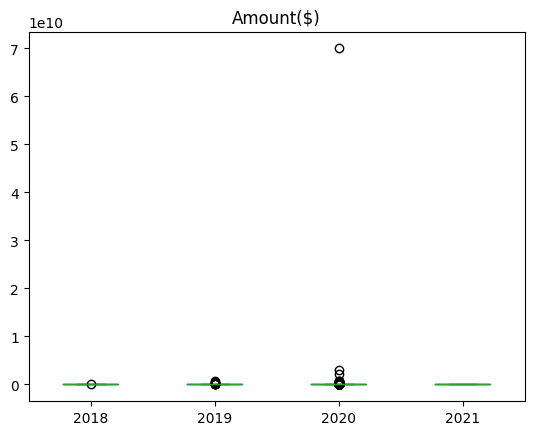

In [108]:
# Visualize the distribution of the start-ups' Stage with boxplot
df.plot.box(column='Amount($)', by='Year')

Amount($)    Axes(0.125,0.11;0.775x0.77)
dtype: object

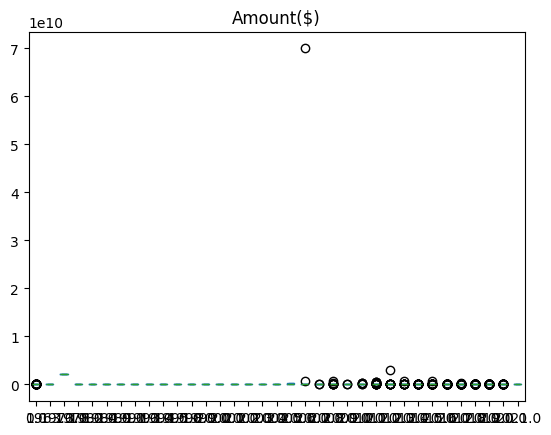

In [109]:
# Visualize the distribution of the start-ups' Location with boxplot
df.plot.box(column='Amount($)', by='Founded')

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Amount($)'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Founded'}>]], dtype=object)

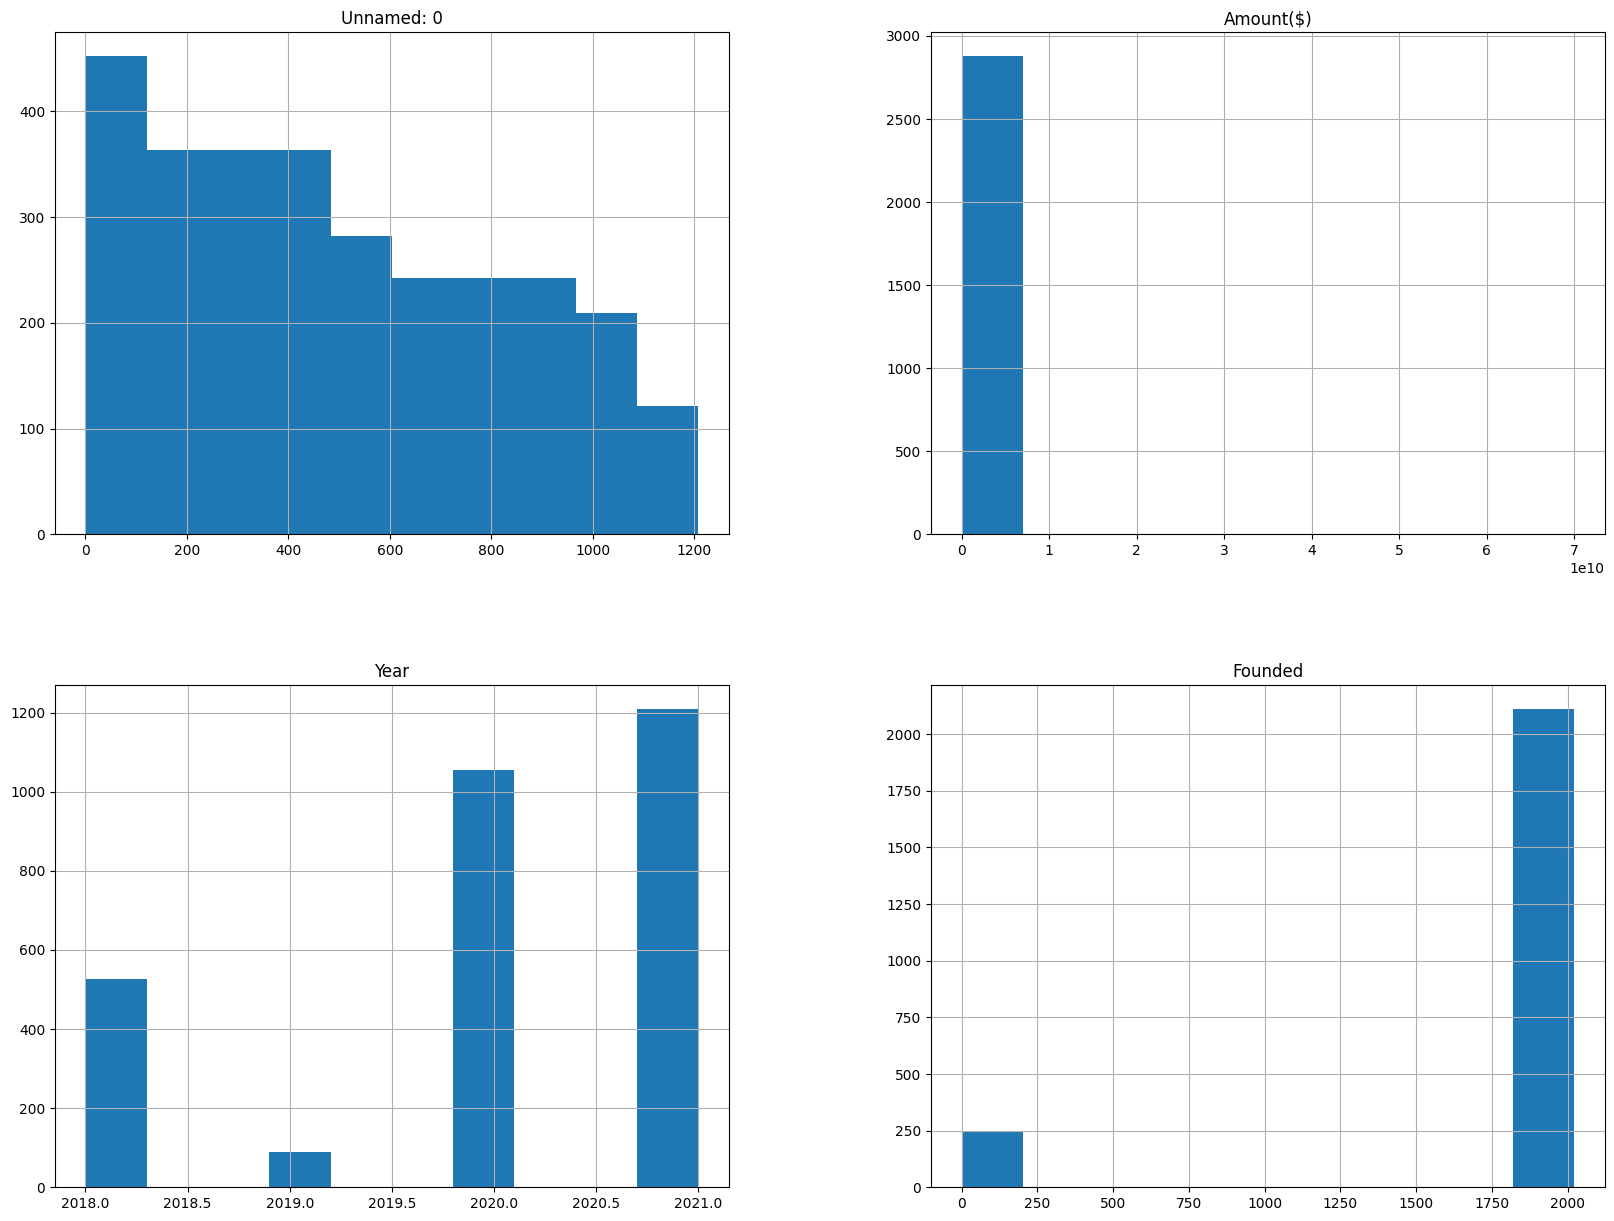

In [110]:
# Distribution of the variables
df.hist(figsize=(20, 15))